In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
plt.style.use('dark_background')

# Load Dataset

In [2]:
x_train = np.load('dataset/x_train.npy').astype(np.float32)
y_train = np.load('dataset/y_train.npy').astype(np.float32)
x_val = np.load('dataset/x_val.npy').astype(np.float32)
y_val = np.load('dataset/y_val.npy').astype(np.float32)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2586, 26, 34, 1) (2586, 1)
(288, 26, 34, 1) (288, 1)


# Preview

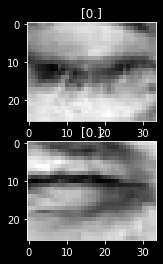

In [4]:
plt.subplot(2, 1, 1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0].reshape((26, 34)), cmap='gray')
plt.subplot(2, 1, 2)
plt.title(str(y_val[4]))
plt.imshow(x_val[4].reshape((26, 34)), cmap='gray')

# Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)

# Build Model

In [6]:
inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26, 34, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 34, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 17, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 8, 128)         73856 

# Train

In [7]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit_generator(
    train_generator, epochs=50, validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('models/%s.h5' % (start_time), monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/50


<ipython-input-7-303b1247d547>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


81/81 [==============================] - ETA: 0s - loss: 0.4727 - acc: 0.7769
Epoch 1: val_acc improved from -inf to 0.87153, saving model to models\2022_02_07_00_38_26.h5
81/81 [==============================] - 2s 16ms/step - loss: 0.4727 - acc: 0.7769 - val_loss: 0.3597 - val_acc: 0.8715 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.2606 - acc: 0.8987
Epoch 2: val_acc improved from 0.87153 to 0.92708, saving model to models\2022_02_07_00_38_26.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.2606 - acc: 0.8987 - val_loss: 0.1642 - val_acc: 0.9271 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.1770 - acc: 0.9393
Epoch 3: val_acc improved from 0.92708 to 0.93056, saving model to models\2022_02_07_00_38_26.h5
81/81 [==============================] - 1s 15ms/step - loss: 0.1770 - acc: 0.9393 - val_loss: 0.1618 - val_acc: 0.9306 - lr: 0.0010
Epoch 4/50
80/81 [============================>.] - ETA: 

Epoch 30/50
81/81 [==============================] - ETA: 0s - loss: 0.0209 - acc: 0.9930
Epoch 30: val_acc did not improve from 0.99653
81/81 [==============================] - 1s 15ms/step - loss: 0.0209 - acc: 0.9930 - val_loss: 0.0116 - val_acc: 0.9965 - lr: 0.0010
Epoch 31/50
81/81 [==============================] - ETA: 0s - loss: 0.0207 - acc: 0.9942
Epoch 31: val_acc did not improve from 0.99653
81/81 [==============================] - 1s 16ms/step - loss: 0.0207 - acc: 0.9942 - val_loss: 0.0472 - val_acc: 0.9861 - lr: 0.0010
Epoch 32/50
81/81 [==============================] - ETA: 0s - loss: 0.0227 - acc: 0.9911
Epoch 32: val_acc did not improve from 0.99653

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
81/81 [==============================] - 1s 15ms/step - loss: 0.0227 - acc: 0.9911 - val_loss: 0.0583 - val_acc: 0.9861 - lr: 0.0010
Epoch 33/50
81/81 [==============================] - ETA: 0s - loss: 0.0149 - acc: 0.9950
Epoch 33: val_acc did

# Confusion Matrix

test acc: 0.9965277777777778


<ipython-input-8-2cdb396ae380>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_logical = (y_pred > 0.5).astype(np.int)


<AxesSubplot:>

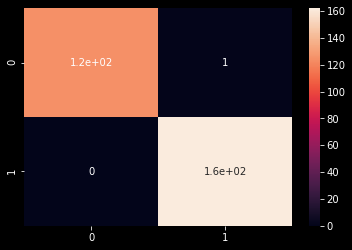

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

model = load_model('models/%s.h5' % (start_time))

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)

# Distribution of Prediction

C:\Users\mjk34\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


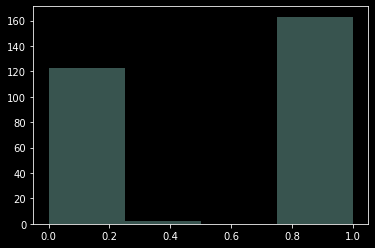

In [9]:
ax = sns.distplot(y_pred, kde=False)